In [290]:
# dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

financials = "./Resources/Tesla Financials/Testla Operations Financials.xlsx"
stock_price = "./Resources/Tesla Stock Price/TSLAstock.xlsx"
ps_ratio = "./Resources/Tesla Stock Price/TSLApsratio.xlsx"
twitter = "./Resources/Tesla Twitter/twitter tweets.xlsx"

In [291]:
# set df_variable: financial statement
financials_excel = pd.read_excel(financials)
financials_df = financials_excel[["date","operating_income","cf_from_operations"]]

In [292]:
# set df_variabel: stock price
stock_price_excel = pd.read_excel(stock_price)
stock_price_df = stock_price_excel[["date","Close","Volume"]]

In [293]:
# set df_variable: price-to-sales ratio
ps_ratio_xlsx = pd.read_excel(ps_ratio)
ps_ratio_df = ps_ratio_xlsx[["date","P/S Ratio"]]

In [294]:
# set df_variable: twitter sentiment
twitter_csv = pd.read_excel(twitter)
twitter_df = twitter_csv[["date","TSLA_compound","ElonMusk_compound"]]

In [295]:
# merge: financials and stock price (AS: tesla_df_1)
tesla_df_1 = pd.merge(financials_df,stock_price_df, how="outer",on="date")

In [296]:
# merge: tesla_df_1 and ps ratio (AS: tesla_df_2)
tesla_df_2 = pd.merge(tesla_df_1,ps_ratio_df, how="outer",on="date")

In [297]:
# merge: tesla_df_2 and twitter (AS: tesla_df_3)
tesla_df_3 = pd.merge(tesla_df_2,twitter_df, how="outer",on="date")

In [298]:
# converting column: convert 'date' column to pandas.to_datetime(), THEN adding it as a new column to df
tesla_df_3["date_converted"] = pd.to_datetime(tesla_df_3["date"])

In [321]:
# converting column: convert 'date' column to pandas.to_numeric(), THEN adding it as a new column to df
tesla_df_3["date_converted_to_numeric"] = pd.to_numeric(tesla_df_3["date_converted"])

In [322]:
# sort: by date (final wrangling/applying as: tesla_df )
tesla_df = tesla_df_3.sort_values(by=["date_converted"],ascending = False)
tesla_df.head()

# use to this code: to audit via excel
# tesla_df.to_csv("tesla_df.csv",index=False,header=True)

,date,operating_income,cf_from_operations,Close,Volume,P/S Ratio,TSLA_compound,ElonMusk_compound,date_converted,date_converted_to_numeric
623,2018-06-19,NaN,NaN,352.550000,12537147.0,5.125,0.078213,0.078213,2018-06-19,1529366400000000000
622,2018-06-18,NaN,NaN,370.829987,11985600.0,5.030,0.108785,0.108785,2018-06-18,1529280000000000000
625,2018-06-17,NaN,NaN,NaN,NaN,NaN,0.130824,0.130824,2018-06-17,1529193600000000000
624,2018-06-16,NaN,NaN,NaN,NaN,NaN,0.130824,0.130824,2018-06-16,1529107200000000000
621,2018-06-15,NaN,NaN,358.170013,10848300.0,4.899,0.108785,0.108785,2018-06-15,1529020800000000000


In [323]:
len(tesla_df["date"])

626

In [324]:
tesla_df.dtypes

date                                 object
operating_income                    float64
cf_from_operations                  float64
Close                               float64
Volume                              float64
P/S Ratio                           float64
TSLA_compound                       float64
ElonMusk_compound                   float64
date_converted               datetime64[ns]
date_converted_to_numeric             int64
dtype: object

# Graph Section:

## Reuben's

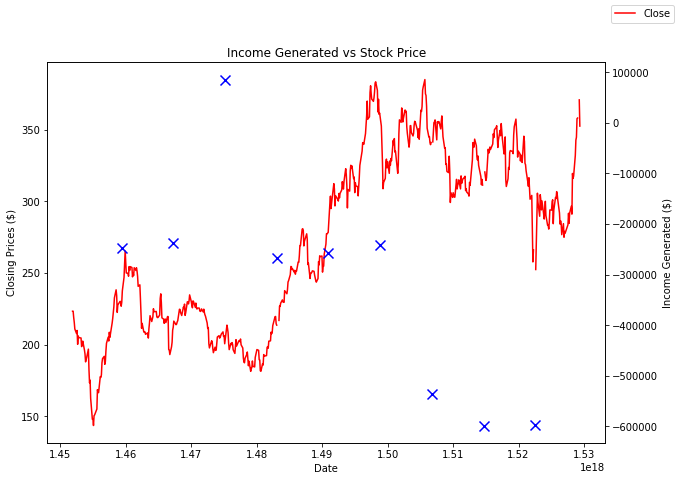

In [428]:
# Plot - Operating Income vs Closing Prices

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="Close",
                   legend=False,
                   color="Red")
    
ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
              y="operating_income",
              kind="scatter",
              marker='x',
              alpha=1,
              c="blue",
              s=100,
              edgecolor="green",
              legend=False,
              figsize=(10,7),
              ax=ax2)

ax.figure.legend()

plt.title("Income Generated vs Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Prices ($)")
ax2.set_ylabel("Income Generated ($)")

plt.savefig("Income Generated vs Stock Prices.png")

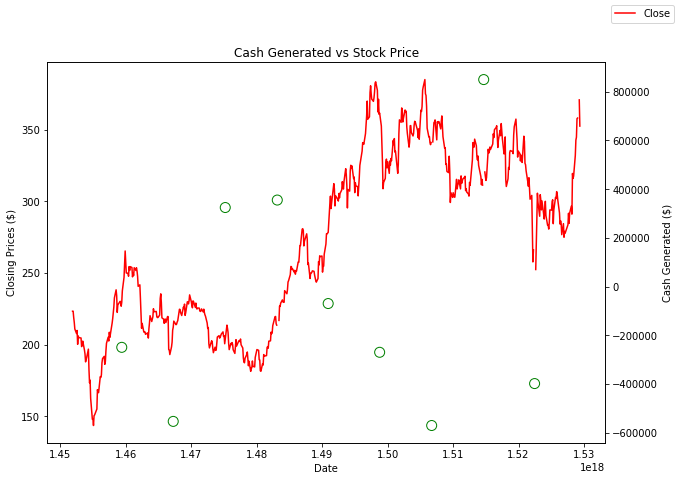

In [429]:
# Plot - CASH Generated from Business Operations vs Closing Prices

# Plot - Operating Income vs Closing Prices

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="Close",
                   legend=False,
                   color="Red")
    
ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
              y="cf_from_operations",
              kind="scatter",
              marker='o',
              alpha=1,
              c="none",
              s=100,
              edgecolor="green",
              legend=False,
              figsize=(10,7),
              ax=ax2)

ax.figure.legend()

plt.title("Cash Generated vs Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Prices ($)")
ax2.set_ylabel("Cash Generated ($)")

plt.savefig("Cash Generated vs Stock Prices.png")

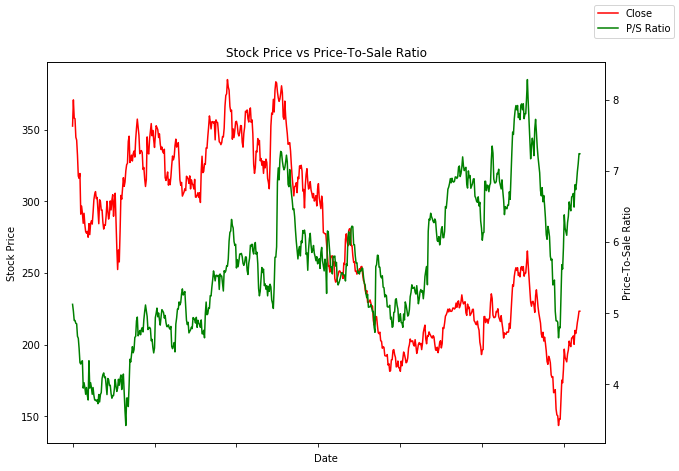

In [424]:
# plot - Stock Price vs PS ratio

andy_df = tesla_df[["date","Close","P/S Ratio"]].dropna(how="any")

ax = andy_df.plot(x="date",
                  y="Close",
                  legend=False,
                  color="red")

ax2 = ax.twinx()

andy_df.plot(x="date",
             y="P/S Ratio",
             ax=ax2,
             legend=False,
             color="Green",
             figsize=(10,7))

ax.figure.legend()

plt.title("Stock Price vs Price-To-Sale Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price ($)")
ax2.set_ylabel("Price-To-Sale Ratio (%)")


plt.savefig("Stock Price vs Price-To_Sale Ratio.png")

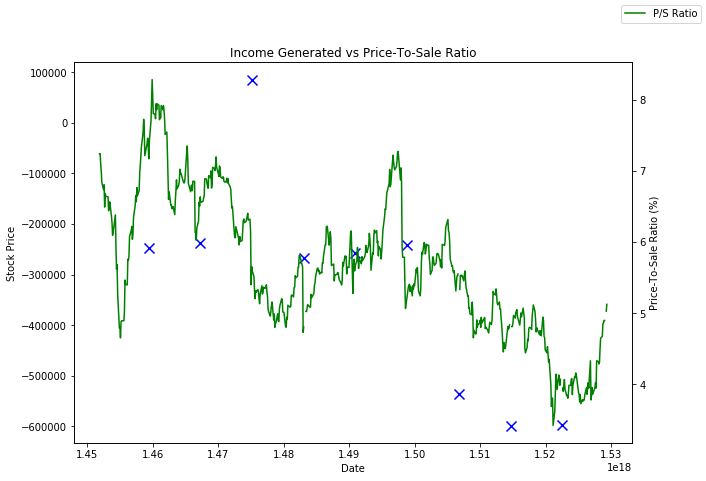

In [431]:
# plot - Operating Income vs PS ratio

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="operating_income",
                   marker='x',
                   legend=False,
                   color="blue",
                   kind="scatter",
                   s=100)

ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
             y="P/S Ratio",
             ax=ax2,
             legend=False,
             color="Green",
             figsize=(10,7))

# plt.xticks(tesla_df["date_converted_to_numeric"], tesla_df["date"], rotation='vertical')

ax.figure.legend()

plt.title("Income Generated vs Price-To-Sale Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
ax2.set_ylabel("Price-To-Sale Ratio (%)")

plt.savefig("Operating Income vs Price-To_Sale Ratio.png")

AttributeError: 'PathCollection' object has no attribute 'twinx'

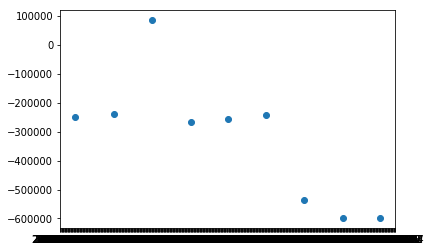

In [396]:
# Financials

# plot - scatter: operating income
ax1 = plt.scatter(tesla_df["date"],
            tesla_df["operating_income"]).twinx()
#             s=<var>,
#             c=<var>,
#             label=<var>,
#             alpha=<int>
#             edgecolors="none")

# plot - scatter: cash flows
ax2 = plt.scatter(tesla_df["date"],
            tesla_df["cf_from_operations"]).twinx()
#             s=<var>,
#             c=<var>,
#             label=<var>,
#             alpha=<int>
#             edgecolors="none")

# plot - line: close stock prices
plt.plot(tesla_df["date"],
         tesla_df["Close"],
         ax = ax1
        )

plt.show()

In [360]:
tesla_df.columns

Index(['date', 'operating_income', 'cf_from_operations', 'Close', 'Volume',
       'P/S Ratio', 'TSLA_compound', 'ElonMusk_compound', 'date_converted',
       'date_converted_to_numeric'],
      dtype='object')

In [ ]:
# Financials

plt.figure(figsize=(900,6))

ax = tesla_df.plot(x="date_converted_to_numeric",
                   y="Close",
                   legend=False,
                   color="Green")
    
ax2 = ax.twinx()

tesla_df.plot(x="date_converted_to_numeric",
              y="cf_from_operations",
              marker='o',
              legend=False,
              color="red",
              kind="scatter",
              s=100)

tesla_df.plot(x="date_converted_to_numeric",
              y="operating_income",
              marker='x',
              legend=False,
              color="blue",
              kind="scatter",
              s=100,
              ax=ax2,
              figsize=(10,7))

# plt.xticks(tesla_df["date_converted_to_numeric"], tesla_df["date"], rotation='vertical')

ax.figure.legend()

plt.title("Financials vs Closing Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Prices")
ax2.set_ylabel("Financials")

# plt.savefig("Operating Income vs Price-To_Sale Ratio.png")

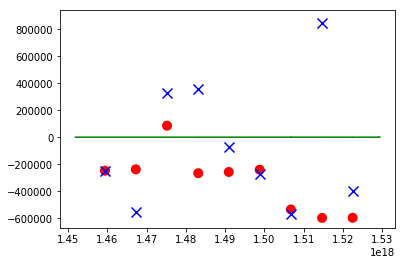

In [371]:
plt.scatter(tesla_df["date_converted_to_numeric"],
            tesla_df["operating_income"],
            marker="o",
            s=100,
            c="red",
            edgecolors="none")
#             alpha=<int>,
#             label=<var>)

plt.scatter(tesla_df["date_converted_to_numeric"],
            tesla_df["cf_from_operations"],
            marker="x",
            s=100,
            c="blue",
            edgecolors="none")
#             alpha=<int>,
#             label=<var>)

plt.plot(tesla_df["date_converted_to_numeric"],
         tesla_df["Close"],
         c="green")

## Andy's

In [ ]:
test_df = andy_df2["date_converted"] = pd.to_datetime(tesla_df["date"])

In [ ]:
# plot - Stock Price vs PS ratio

andy_df2["date_converted"] = pd.to_datetime(tesla_df["date"])
# andy_df2 = tesla_df[["date_converted","operating_income","P/S Ratio"]]

plt.figure(figsize=(900,6))


plt.scatter(andy_df2["date_converted"],
            andy_df2["",
            s=<var>,
            c=<var>,
            label=<var>,
            alpha=<int>,
            edgecolors="none")

plt.scatter(<xaxis>,
            <yaxis>,
            s=<var>,
            c=<var>,
            label=<var>,
            alpha=<int>,
            edgecolors="none")




ax = andy_df.plot(x="date",
                  y="Close"300,
                  legend=False,
                  color="blue",
                  kind="scatter")

# ax2 = ax.twinx()

# andy_df.plot(x="date",
#              y="P/S Ratio",
#              ax=ax2,
#              legend=False,
#              color="Green",
#              figsize=(10,7))

ax.figure.legend()

plt.title("Stock Price vs Price-To-Sale Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
ax2.set_ylabel("Price-To-Sale Ratio")

andy_df2.dtypes

# plt.savefig("Stock Price vs Price-To_Sale Ratio.png")

In [ ]:
plt.scatter(<xaxis>,
            <yaxis>,
            s=<var>,
            c=<var>,
            label=<var>,
            alpha=<int>,
            edgecolors="none")

plt.scatter(<xaxis>,
            <yaxis>,
            s=<var>,
            c=<var>,
            label=<var>,
            alpha=<int>,
            edgecolors="none")


In [ ]:

plt.scatter(x=andy_df2["date"], y=andy_df2["operating_income"], marker="x")
plt.scatter(x=andy_df2["date"], y=andy_df2["P/S Ratio"])
ax.figure.legend()

plt.title("Operating Income vs Price-To-Sale Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("Operating Income")
ax2.set_ylabel("Price-To-Sale Ratio")
plt.show()

In [ ]:
# plt.figure(figsize=(900,6))

plt.scatter(x=andy_df2["date"], y=andy_df2["operating_income"], marker="x")
plt.scatter(x=andy_df2["date"], y=andy_df2["P/S Ratio"])

plt.title("Operating Income vs Price-To-Sale Ratio")

plt.show()
# ax.set_xlabel("Date")
# ax.set_ylabel("Operating Income")
# ax2.set_ylabel("Price-To-Sale Ratio")

In [ ]:
andy_df2.info()

In [ ]:
plt.plot(x=andy_df2["date"], y=andy_df2["P/S Ratio"])
plt.show()

In [ ]:
andy_df2["P/S Ratio"]

In [ ]:
# plot - Financials vs PS ratio

# andy_df2 = tesla_df[["date","operating_income","P/S Ratio"]].dropna(how="any")
andy_df2 = tesla_df[["date","operating_income","P/S Ratio"]]

andy_df2.to_csv("Test.csv")

In [ ]:
andy_df2.info()

In [ ]:
# plot - Financials vs PS ratio

andy_df2 = tesla_df[["date","operating_income","P/S Ratio"]]

plt.figure(figsize=(900,6))

ax = andy_df2.plot(x="date",
                  y="operating_income",
                  legend=False,
                  color="blue",
                  grid=True)

ax2 = ax.twinx()

andy_df.plot(x="date",
             y="P/S Ratio",
             ax=ax2,
             legend=False,
             color="Green",
             figsize=(10,7))

ax.figure.legend()

plt.title("Operating Income vs Price-To-Sale Ratio")
ax.set_xlabel("Date")

ax.set_ylabel("Operating Income")
ax2.set_ylabel("Price-To-Sale Ratio")

# plt.savefig("Stock Price vs Price-To_Sale Ratio.png")

NameError: name 'time' is not defined

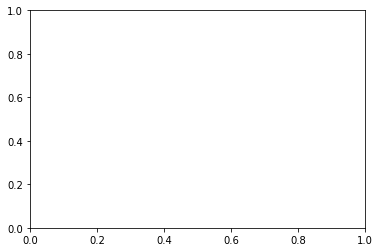

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, Swdown, '-', label = 'Swdown')
ax.plot(time, Rn, '-', label = 'Rn')
ax2 = ax.twinx()
ax2.plot(time, temp, '-r', label = 'temp')
ax.legend(loc=0)
ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")
ax2.set_ylabel(r"Temperature ($^\circ$C)")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
plt.show()